##  Max Independent Set - MIS


The problem statement is the following: 

Find the largest subset of vertices such that none of the vertices share an edge. 

Mathematically, given a graph $G(V,E)$ where $V$ are the vertices or nodes and $E$ are undirected edges. The MIS is an independent set that is not a subset of any other independent set. 

**Basically, there are no vertices outside of the independent set that may be joined because it is maximum with respect to the independent set property**



In the following example, a graph with 5 nodes is partitioned into 2 sets: the blue and the red. The red being the MIS. However, the coloring is not the only solution, as you can see  


<center>
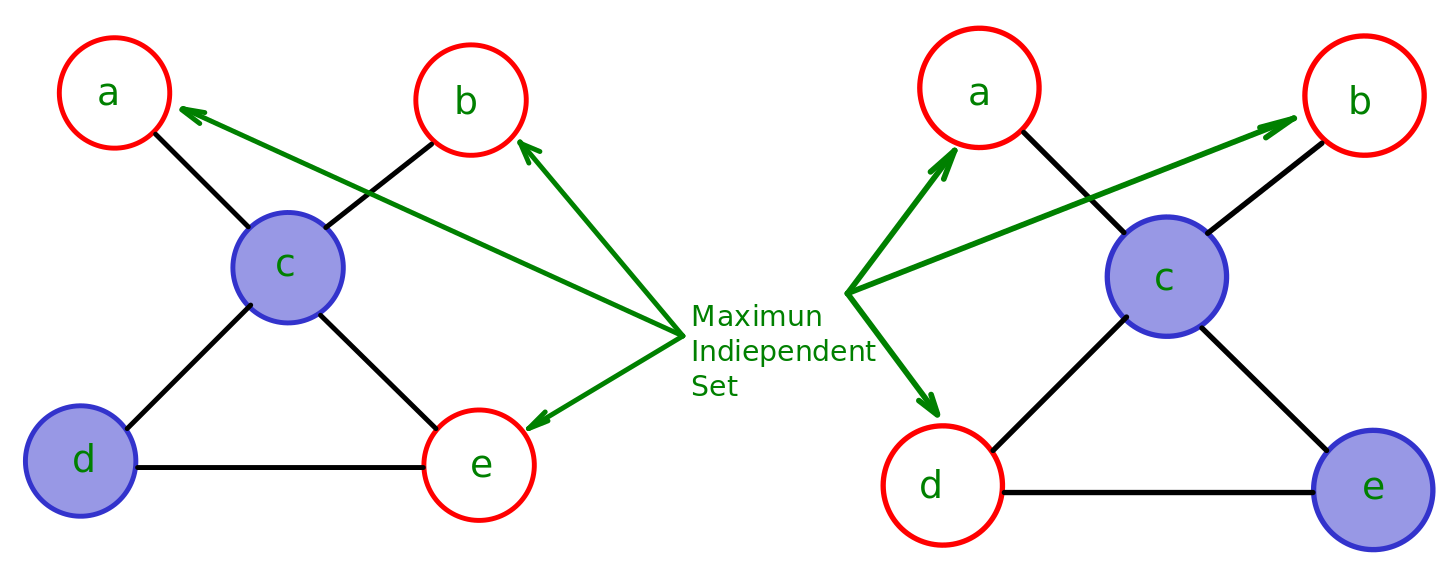
<center>



Note: 
- Independent Set: is the set of nodes such that there is not direct edge. Example:{a,b} or {b,e} or {a,b,d}

### Example: find the MIS of the following graph

Given the following graph, find a MIS by a greedy algorithm


<center>
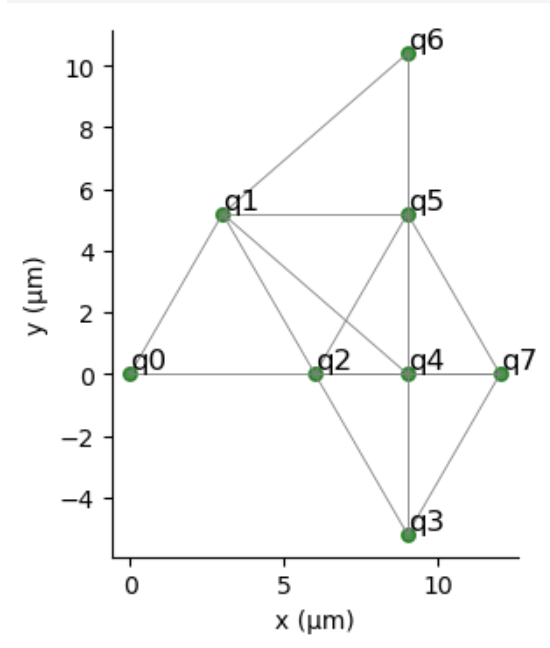
<center>

#### Work on a greedy algorithm


In [15]:
## try without coding - pen and paper

## MIS with Anolag setting

Matematically, when looking to the MIS of a graph, we separate the vertices into 2 classes: the independent ones and the other

 - $z_i = 1$ if the i-th vertex is attributed to MIS or 
 - $z_i = 0$ otherwise
 
 The MIS corresponds to the minimum of 
 
 $$C(z_1,z_2,\dots,z_N) = - \sum _ {i =1}^N z_i + U \sum _{(i,j) \in E} z_i z_j,$$
 
 where $U$ is a penalty coefficent and the argument of $C$, the elements $(z_1,z_2,\dots,z_N)$ is the MIS of the graph


### Connection with the Analog Hamiltonian

Our neutral atom Hamiltonian may reproduce the last cost function



<center>
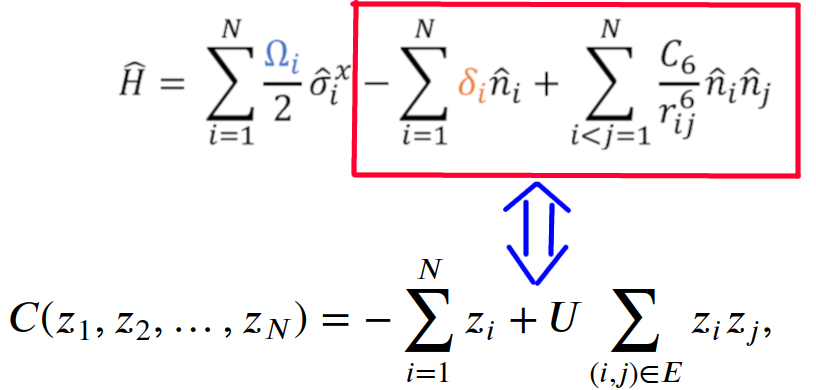
<center>



### Analog computing will fit in the following framework

Analog quantum algorithms usually fit in a framework described by the Hamiltonian

$H(t) = u(t) H_M +(1-u(t)) H_C$, where

  - $H_C$ : problem / cost Hamiltonian. It encodes the optimization task that we are solving. 
    Also, the ground state corresponds to the solution of our problem
  - $H_M$ : the mixing Hamiltonian. It does not conmute with $H_C$, and the ground state is easy to prepare.
  - $u(t) \in [0,1]$: the control function - controls the ratio between $H_C$ and $H_M$. 
  
In our Hamiltonian, the term

- that contains $\sigma_x$ is $H_M$
- that contains: $n_i$ and $n_i n_j$ is $H_C$
- and $\Omega $ and $\delta$ are the control function $u(t)$

### The adiabatic theorem



How the control function should be designed? 

We would like to have an adibatic time evolution. Thus, we keep the system in the instantaneous ground state all along the evolution. Slowly varing the conditions $\Omega$ and $\delta$ allows the system to adapt to the new configuration. Hence, if the system starts in an eigen-state of the initial Hamiltonian, it will end in the eigen-state of the final Hamiltonian.


<center>
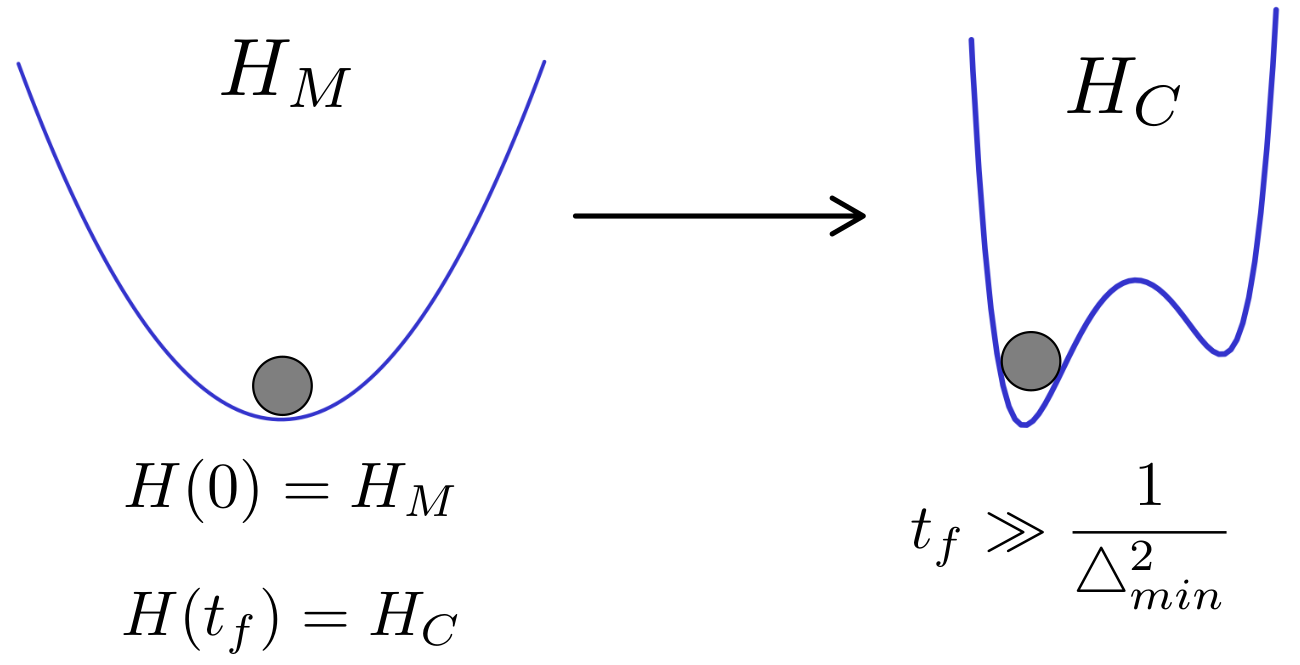
<center>
    
    
The time duration of the whole evolution, $t_f$, must accomplish the following 
    
$$t_f \gg \frac{1}{\triangle^2 _{min}},$$
    
where $\triangle _{min}$ is the minimum Energy gap between the ground state and the first excited state. 
    

 If we do not respect this condition, the system may jump to an excited state of the instantaneous Hamiltonian and the final state will not be the solution of the problem. 

<center>
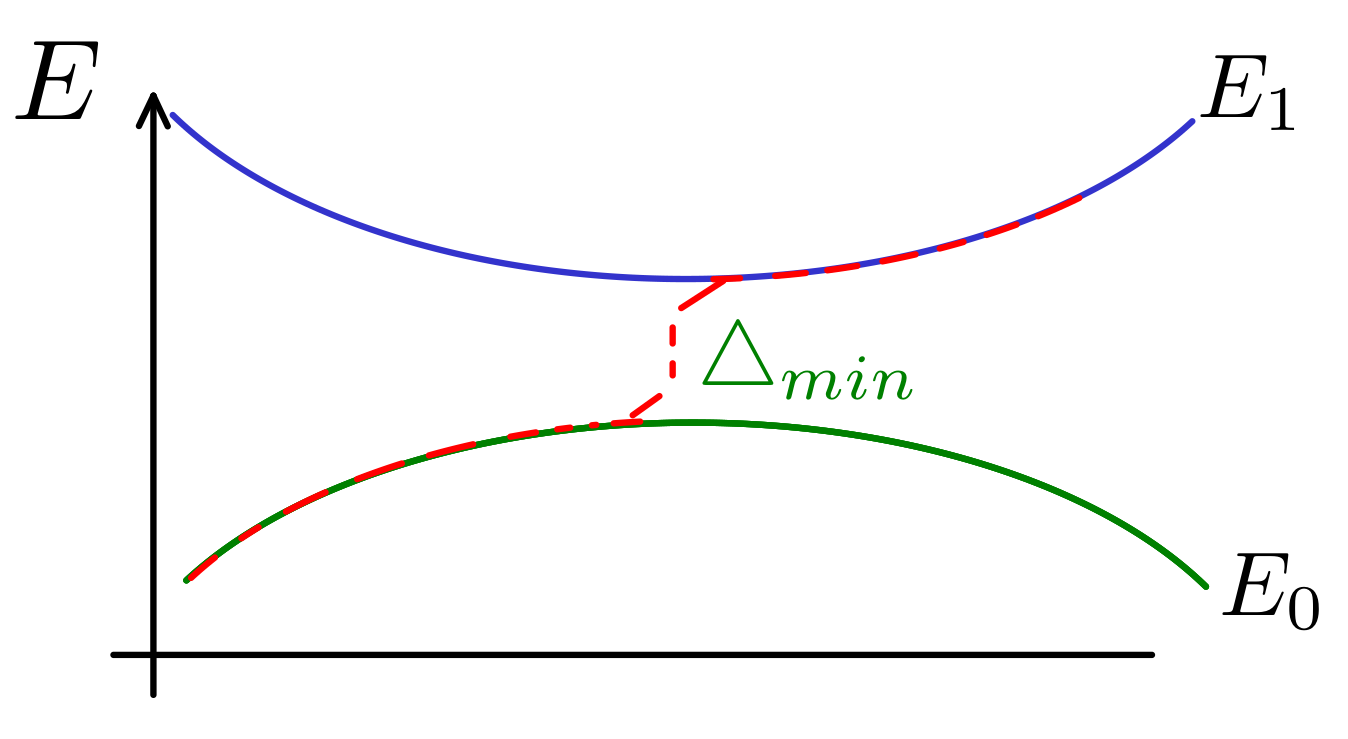
<center>
    


### MIS solution with an analog quantum algorithm




In [16]:
# we have defined a dictionary with the name of the qubit, and the position (in um) of each one
# given by a pair of coordinates. Each node is equivalent to a qubit

qubit_positions = {
    'q0': (0, 0),
    'q1': (3, 5.2),
    'q2': (6, 0),
    'q3': (9, -5.2),
    'q4': (9, 0),
    'q5': (9, 5.2),
    'q6': (9, 10.4),
    'q7': (12, 0),
}

In [17]:
import numpy as np
from pulser import Pulse, Sequence, Register
from pulser_simulation import Simulation
from pulser.devices import MockDevice, AnalogDevice
from pulser.waveforms import RampWaveform, ConstantWaveform
from pulser_simulation import QutipEmulator # emulator 

import matplotlib.pyplot as plt

import qutip

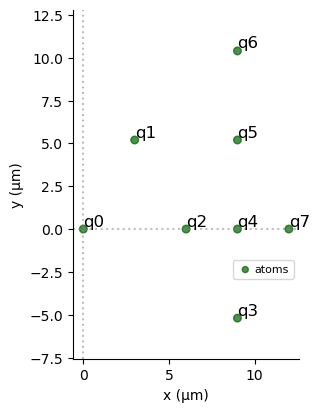

In [18]:
# saving the positions of the nodes in a register

reg = Register(qubit_positions)
reg.draw()

In [19]:
# we are going to define the maximum Rabi frequency or amplitude by imposing a blockade radius
# (units are um for the blockade radius and rad/us for the rabi frequency)

blockade_radius = 8.7
Omega_max = MockDevice.rabi_from_blockade(blockade_radius)#use 
print(Omega_max)

12.499610303500795


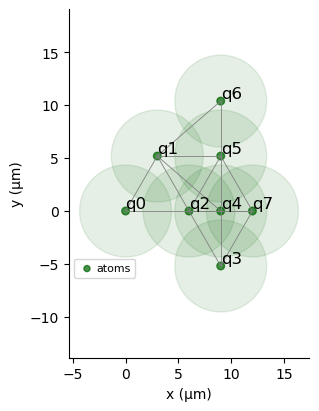

In [20]:
# Visualize the edges induced by the chosen blockade radius

reg.draw(blockade_radius=blockade_radius,draw_graph=True,draw_half_radius=True)

In [21]:
# Find the MIS of the graph, use the same sequence as the AFM state but change delta_f = 2*U
# use also MockDevice

In [ ]:
simulation = QutipEmulator.from_sequence(seq, sampling_rate=0.1) # increase the number of steps
results = simulation.run(progress_bar=True)

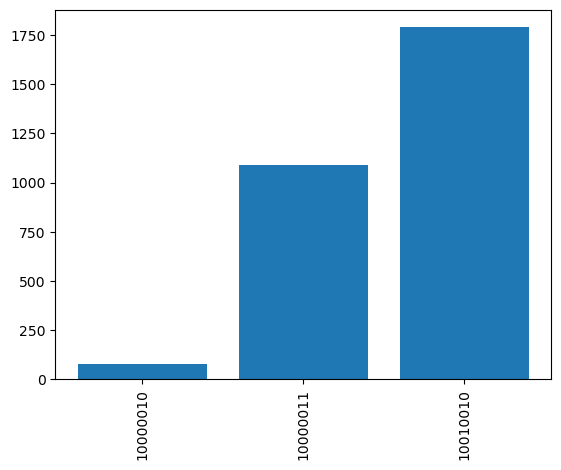

In [26]:
count = results.sample_final_state(N_samples=3000)

most_freq = {k: v for k, v in count.items() if v >30}
plt.bar(list(most_freq.keys()), list(most_freq.values()))
plt.xticks(rotation="vertical")
plt.show()

In [27]:
# Isolate the best score

best_bitstring = max(count, key=count.get)
print(best_bitstring)

10010010


In [28]:
## the result correspods to q0, q3 and q6, which is the solution of the greedy algorithm